In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Mohamed
[nltk_data]     Khaled\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df = pd.read_csv('twitter_training.csv', names=['ID', 'Entity', 'Sentiments', 'Contest'], header=0)

In [4]:
df.dropna(subset=['Contest'], inplace=True)  # Drop rows with missing 'Contest' text
df.drop_duplicates(inplace=True)  # Remove duplicate rows
df.reset_index(drop=True, inplace=True)  # Reset index after dropping rows



In [5]:
print(f"Data shape: {df.shape}")
print(df.head())


Data shape: (71655, 4)
     ID       Entity Sentiments  \
0  2401  Borderlands   Positive   
1  2401  Borderlands   Positive   
2  2401  Borderlands   Positive   
3  2401  Borderlands   Positive   
4  2401  Borderlands   Positive   

                                             Contest  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [6]:
vader = SentimentIntensityAnalyzer()


In [7]:
def get_vader_sentiment(text):
    score = vader.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [8]:
df['Predicted_Sentiments'] = df['Contest'].apply(get_vader_sentiment)


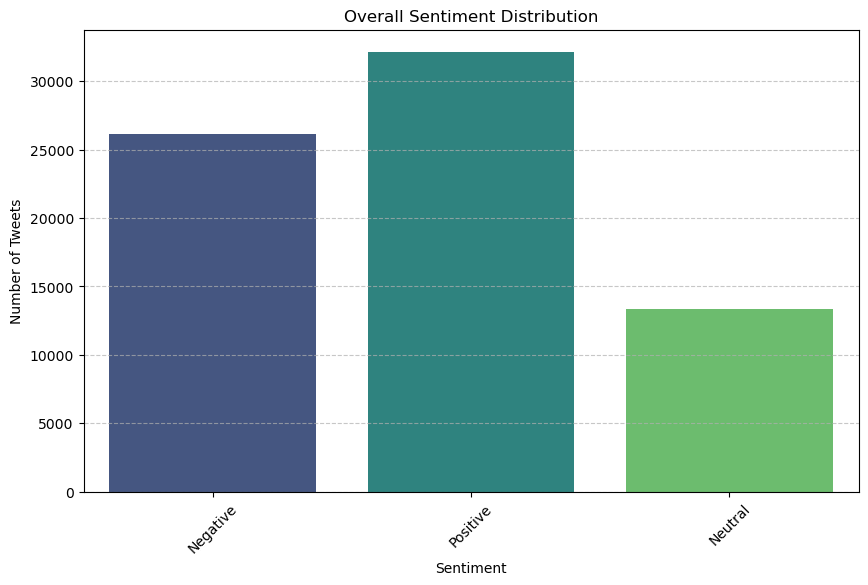

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Predicted_Sentiments', palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


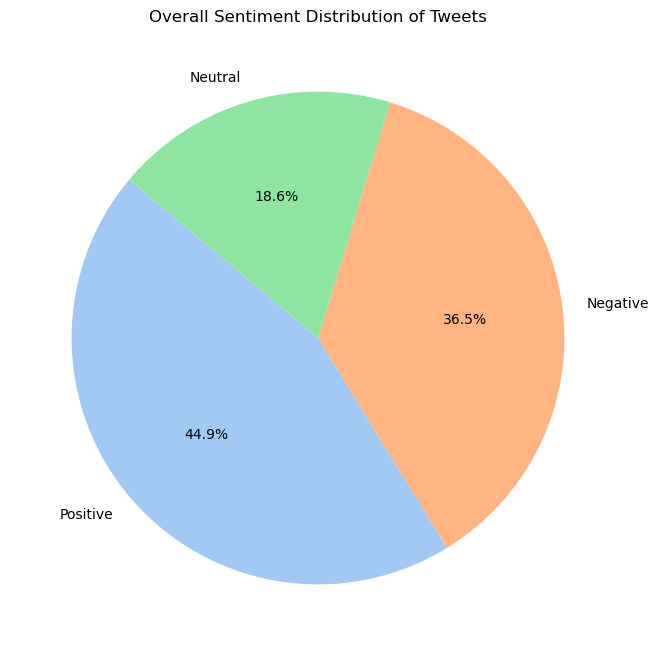

In [10]:
sentiment_counts = df['Predicted_Sentiments'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Overall Sentiment Distribution of Tweets')
plt.show()